<a href="https://colab.research.google.com/github/GustavoG0mes/MVP2/blob/main/MVP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - (Nome do projeto)

Nome: Gustavo Gomes de Mendonça

Matrícula: 4052025000733

Dataset utilizado: (https://github.com/GustavoG0mes/MVP1)

Projeto: House Prices

## Descrição do Problema

O desafio consiste em estimar o preço de venda de imóveis residenciais a partir de atributos estruturais, de qualidade e de localização. A base é a da competição House Prices: Advanced Regression Techniques (Kaggle), composta por variáveis numéricas e categóricas — como metragem de área, ano de construção/reforma, qualidade de materiais, presença de porão/garagem, tipo de revestimento, bairro, entre outras.

Trata-se de um problema clássico de regressão supervisionada, com algumas particularidades:

Dados faltantes em diversas colunas.

Múltiplas variáveis categóricas (necessitam codificação adequada).

Distribuições assimétricas (incluindo o preço), presença de outliers e escalas distintas.

Possíveis interações não lineares entre atributos (ex.: qualidade × área × ano).

Do ponto de vista de negócio, prever preços com maior precisão ajuda a precificar melhor, comparar imóveis semelhantes, reduzir assimetria de informação e suportar decisões de compra, venda, avaliação de garantias e crédito.

## Objetivo do MVP

Aplicar conhecimentos de Machine Learning para construir um modelo de previsão de preços de casas com boa capacidade de generalização, documentando de forma reprodutível todo o processo:

Preparação dos dados

Análise exploratória (EDA), tratamento de nulos e outliers.

Codificação de variáveis categóricas e eventuais transformações (ex.: log do preço).

Modelagem e validação

Treinar modelos de regressão (lineares regularizados e/ou baseados em árvores/boosting).

Comparar abordagens via validação cruzada.

Ajustar hiperparâmetros de forma objetiva.

Métrica de avaliação

Utilizar a métrica oficial da competição: RMSE do log do preço de venda (Root Mean Squared Log Error), que penaliza erros relativos e lida melhor com a assimetria do alvo.


### Importação das bibliotecas



In [338]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [339]:
# Carregamento do dataset em um DF do pandas
url = 'https://raw.githubusercontent.com/GustavoG0mes/MVP2/main/train.csv'
treino = pd.read_csv(url)

In [340]:
# Conferindo se a base foi carregada e dados importantes
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [341]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Importante verificar a coluna Alley, 91 linhas somente estão como não nulas.

###  Explorando os dados

In [342]:
# Visualizando a quantidade de valores vazios
treino.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [343]:
# Verificando em percentual
percentual = (treino.isnull().sum() / treino.shape[0] * 100).sort_values(ascending=False).head(20)
percentual = percentual.round(2).astype(str) + ' %'
print(percentual)

PoolQC          99.52 %
MiscFeature      96.3 %
Alley           93.77 %
Fence           80.75 %
MasVnrType      59.73 %
FireplaceQu     47.26 %
LotFrontage     17.74 %
GarageQual       5.55 %
GarageFinish     5.55 %
GarageType       5.55 %
GarageYrBlt      5.55 %
GarageCond       5.55 %
BsmtFinType2      2.6 %
BsmtExposure      2.6 %
BsmtCond         2.53 %
BsmtQual         2.53 %
BsmtFinType1     2.53 %
MasVnrArea       0.55 %
Electrical       0.07 %
Condition2        0.0 %
dtype: object


* Entendo que podemos retirar as colunas que possuem mais de 10% de valores vazios, a fim de minimizar erros e garantir melhor consistência nos modelos.

In [344]:
# Eliminando as colunas com mais de 10% de valores nulos
eliminar = treino.columns[treino.isnull().sum()/treino.shape[0] > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [345]:
# Eliminando as colunas
treino = treino.drop(eliminar,axis=1)

 A meta é criar um modelo para verificar o quanto estamos errando e depois planejar como melhorar, sendo assim irei:

* Retirar os valores vazios
* Eliminar colunas de texto
* Escolher alguns algoritimos para testar e um método de avaliação de erro

In [346]:
# Retirando os valores vazios (o -1 é utilizado como padrão em alguns casos)
treino = treino.fillna(-1)

In [347]:
# Verificando novamente as informações
percentual2 = (treino.isnull().sum() / treino.shape[0] * 100).sort_values(ascending=False).head(20)
percentual2 = percentual2.round(2).astype(str) + ' %'
print(percentual2)


Id              0.0 %
MSSubClass      0.0 %
MSZoning        0.0 %
LotArea         0.0 %
Street          0.0 %
LotShape        0.0 %
LandContour     0.0 %
Utilities       0.0 %
LotConfig       0.0 %
LandSlope       0.0 %
Neighborhood    0.0 %
Condition1      0.0 %
Condition2      0.0 %
BldgType        0.0 %
HouseStyle      0.0 %
OverallQual     0.0 %
OverallCond     0.0 %
YearBuilt       0.0 %
YearRemodAdd    0.0 %
RoofStyle       0.0 %
dtype: object


In [348]:
# Selecionando apenas colunas númericas
col_nr = treino.columns[treino.dtypes != 'object']
col_nr

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [349]:
# Criando uma nova base com esses valores (primeira base de treino)
treino = treino.loc[:,col_nr]

## Criando o modelo

- **Vou separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [350]:
# definindo X e Y
X = treino.drop('SalePrice',axis=1) #Eliminando a coluna que quero prever
y = treino.SalePrice # A coluna que eu quero prever

In [351]:
# separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Nessa próxima etapa vou selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

### Regressão linear

In [352]:
# Criando o regressor e fazendo fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [353]:
# Fazendo a previsão prara os dados de teste
y_pred_rl = reg_rl.predict(X_test)

### Árvore de regressão

In [354]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train,y_train)

In [355]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

In [356]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)

In [357]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

- **Avaliação desses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [358]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23763.187393064567
1533982883.444864


In [359]:
# Avaliando o erro da árvore de decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27907.587136929462
2199198609.773859


In [360]:
# Avaliando o erro do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33273.08298755187
2733937586.841286


Podemos então plotar visualmente a relaçao do y_test com as previsões realizadas utilizando o Matplotlib

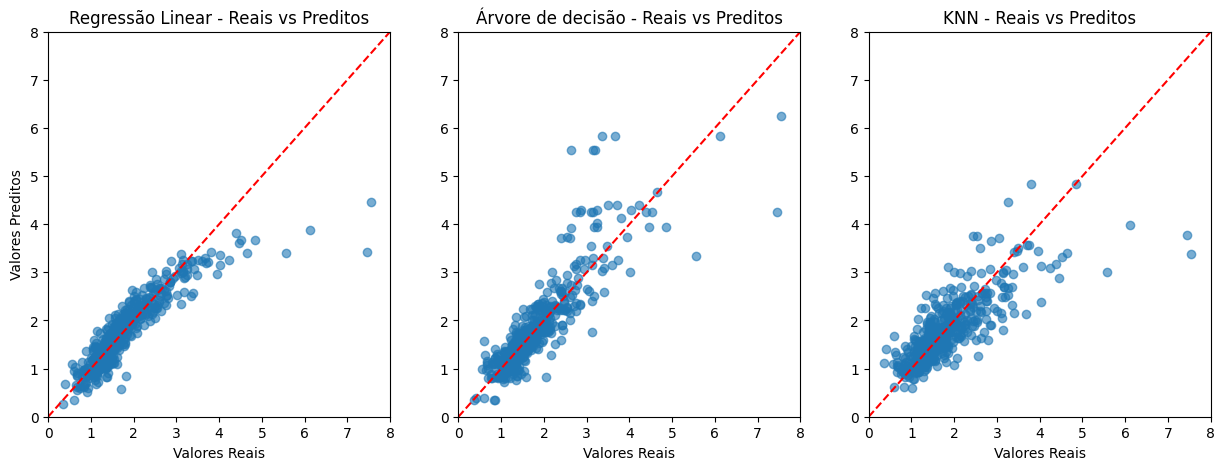

In [361]:
# Criando o gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000, alpha=0.6) # fazendo a divisão fica melhor visualmente para verificação
ax[0].set_xlabel("Valores Reais")
ax[0].set_ylabel("Valores Preditos")
ax[0].set_title("Regressão Linear - Reais vs Preditos")
ax[0].set(xlim=(0,8),ylim=(0,8))
ax[0].plot([0,8],[0,8],'--r') #linha para identificar mais fácil qual está correto

ax[1].scatter(y_test/100000, y_pred_ad/100000, alpha=0.6)
ax[1].set_xlabel("Valores Reais")
ax[1].set_title("Árvore de decisão - Reais vs Preditos")
ax[1].set(xlim=(0,8),ylim=(0,8))
ax[1].plot([0,8],[0,8],'--r') #linha para identificar mais fácil qual está correto

ax[2].scatter(y_test/100000, y_pred_knn/100000, alpha=0.6)
ax[2].set_xlabel("Valores Reais")
ax[2].set_title("KNN - Reais vs Preditos")
ax[2].set(xlim=(0,8),ylim=(0,8))
ax[2].plot([0,8],[0,8],'--r') #linha para identificar mais fácil qual está correto

plt.show()

Quanto mais distante da reta, mais estou errando na previsão.

Sendo assim vou utilizar a regressão linear por ter sido o algoritimo com menor erro quadrático médio.

## Fazendo a previsão para a base de teste

In [362]:
# Carregamento do dataset em um DF do pandas
url2 = 'https://raw.githubusercontent.com/GustavoG0mes/MVP2/main/test.csv'
teste = pd.read_csv(url2)

In [363]:
# Visualizando a base
teste.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal


É necessário repetir os mesmos tratamentos que foram realizados na base de treino, sem excluir linhas.

In [364]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [365]:
# Verificando as colunas numéricas
col_nr_teste = teste.columns[teste.dtypes != 'object']
col_nr_teste

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [366]:
# Mantendo apenas as colunas númericas
teste = teste.loc[:,teste.columns[teste.dtypes != 'object']]

In [367]:
# Verificando a base restante
teste.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [368]:
# Visualizando a quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False)

,0
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
GarageCars,1
GarageArea,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFinSF1,1


Da mesma forma que foi realizado anteriormente, vou alterar todos os valores vazios por -1, sendo assim ele não vai se confundir com 0 e depois é possível retornar de forma fácil os valores que foram realizados ajustes.

In [369]:
# Trocando os valores vazios por -1
teste= teste.fillna(-1)

In [370]:
# Visualizando a quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False).head(3)

,0
Id,0
MSSubClass,0
LotArea,0


In [371]:
y_pred = reg_rl.predict(teste)

Agora os dados estão prontos para receber o modelo que escolhemos (Regressão linear)

In [372]:
y_pred

array([122234.99595955, 139178.26368417, 169872.05425124, ...,
       175307.58803209, 106132.5314242 , 251494.07738729])

In [373]:
# Adicionando essa coluna de previsão na base
teste['SalePrice'] = y_pred

In [374]:
teste.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,122234.995960
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,139178.263684
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,169872.054251
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,199138.801656
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,196257.109229
5,1466,60,10000,6,5,1993,1994,0.0,0.0,0.0,...,157,84,0,0,0,0,0,4,2010,182619.859664
6,1467,20,7980,6,7,1992,2007,0.0,935.0,0.0,...,483,21,0,0,0,0,500,3,2010,200754.866272
7,1468,60,8402,6,5,1998,1998,0.0,0.0,0.0,...,0,75,0,0,0,0,0,5,2010,173034.148984
8,1469,20,10176,7,5,1990,1990,0.0,637.0,0.0,...,192,0,0,0,0,0,0,2,2010,208088.214359
9,1470,20,8400,4,5,1970,1970,0.0,804.0,78.0,...,240,0,0,0,0,0,0,4,2010,118252.269057


Como estou utilizando uma base de competição do kaggle, vou realizar a exportação dos dados para avaliar meus dados previstos.

In [375]:
# Extração de ID e Sales Price
base_kaggle = teste [['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [376]:
# Exportando a base

#base_kaggle.to_csv('resultado.csv',index=False)

Deixei comentato pois utilizei esse passo para extrair a base e utilizar no kaggle como efeito de avalidação.

No GITHUB pode ser visto o resultado da previsão, a margem de erro ficou em 0.25.

Nessa etapa do projeto, vou refazer a análise e previsão, porém realizando data cleaning completo dos dados

In [377]:
# Importando os datasets

url = 'https://raw.githubusercontent.com/GustavoG0mes/MVP2/main/train.csv'
url2 = 'https://raw.githubusercontent.com/GustavoG0mes/MVP2/main/test.csv'

treino = pd.read_csv(url)
teste =pd.read_csv(url2)


In [378]:
treino.head(2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [379]:
teste.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


## Exploração dos dados

In [380]:
# Visualizando quantidade de valores vazios
treino.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [381]:
# Verificando em percentual
percentual = (treino.isnull().sum() / treino.shape[0] * 100).sort_values(ascending=False).head(20)
percentual = percentual.round(2).astype(str) + ' %'
print(percentual)

PoolQC          99.52 %
MiscFeature      96.3 %
Alley           93.77 %
Fence           80.75 %
MasVnrType      59.73 %
FireplaceQu     47.26 %
LotFrontage     17.74 %
GarageQual       5.55 %
GarageFinish     5.55 %
GarageType       5.55 %
GarageYrBlt      5.55 %
GarageCond       5.55 %
BsmtFinType2      2.6 %
BsmtExposure      2.6 %
BsmtCond         2.53 %
BsmtQual         2.53 %
BsmtFinType1     2.53 %
MasVnrArea       0.55 %
Electrical       0.07 %
Condition2        0.0 %
dtype: object


Um TXT com as descrições dos dados foi disponilibilizado e salvo em https://github.com/GustavoG0mes/MVP2/blob/main/data_description.txt

<a id='4top'></a>
- **As 4 primeiras colunas tem mais de 80% dos valores vazios na base de treino**
    - Ao invés de eliminar essas colunas vou entender cada um dos dados:
        - **PoolQC**: **Qualidade** da piscina
            - NA: No Pool
        - **MiscFeature**: Qualquer recurso não considerado nas outras categorias
            - NA: None
        - **Alley**: Tipo de beco / ruela para acesso a propriedade
            - NA: No alley access
        - **Fence**: **Qualidade** da cerca
            - NA: No Fence


- Nesse caso **o NA não é ausência de informação, <font color='red'>ele é uma informação</font>**


- Podemos entender melhor os dados nessas colunas e principalmente sua **relação com o preço de venda**.

In [382]:
# substituindo os valores vazios então por -1 nessas colunas (sendo assim o -1 representa a ausencia de algo)
treino[['PoolQC','MiscFeature','Alley','Fence']] = treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

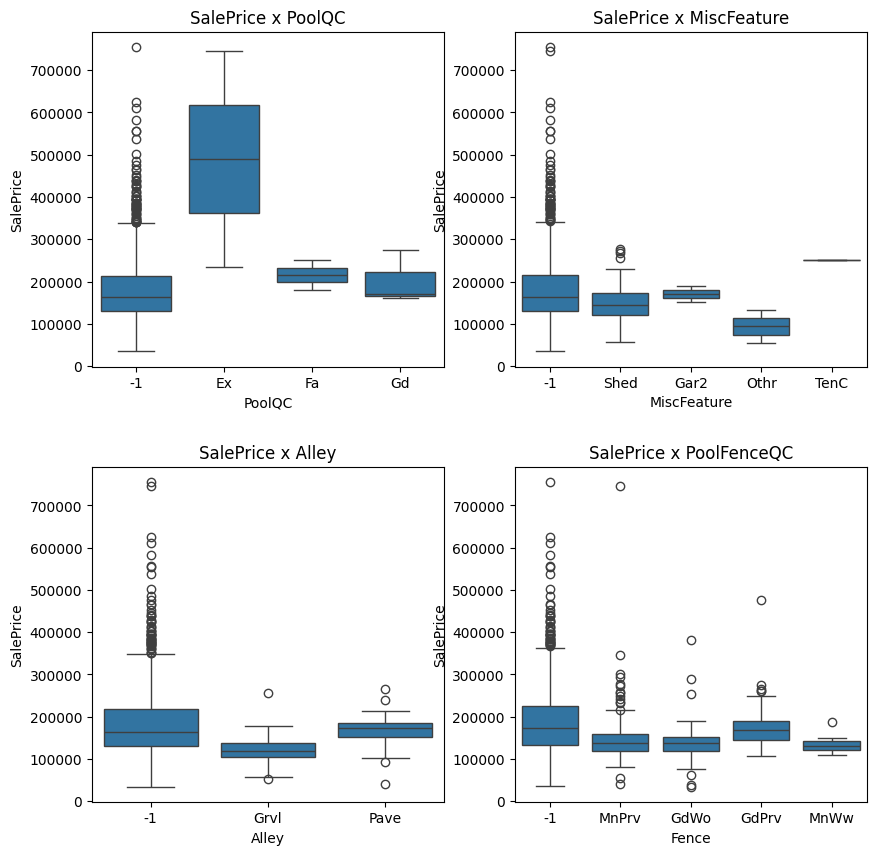

In [383]:
# Visualizando a relação com preço

fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(10,10))
sns.boxplot(data=treino, x='PoolQC', y='SalePrice', ax=ax[0,0])
ax[0,0].set_title('SalePrice x PoolQC')
sns.boxplot(data=treino, x='MiscFeature', y='SalePrice', ax=ax[0,1])
ax[0,1].set_title('SalePrice x MiscFeature')
sns.boxplot(data=treino, x='Alley', y='SalePrice', ax=ax[1,0])
ax[1,0].set_title('SalePrice x Alley')
sns.boxplot(data=treino, x='Fence', y='SalePrice', ax=ax[1,1])
ax[1,1].set_title('SalePrice x PoolFenceQC')

plt.subplots_adjust(hspace=0.3)
plt.show()

Confirmando o que era esperado, quando a casa possui piscina em uma qualidade excelente o preço é muito superior.

Próximo passo é realizar os mesmos tratamentos para a base de teste

In [384]:
# Verificando a base de teste
teste.shape

(1459, 80)

In [385]:
# Ajustando a base de teste
teste[['PoolQC','MiscFeature','Alley','Fence']] = teste[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [386]:
# Verificando o shape da base de teste
teste.shape


(1459, 80)

<a id=FireplaceQu></a>
- **Agora analisando a coluna FireplaceQu</font>**
- Temos 2 colunas relacionadas a lareiras:
    - **Fireplaces**: Number of fireplaces
    - **FireplaceQu**: Fireplace quality

In [387]:
# Visualizando a quantidade de registros em cada rótulo
treino[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            690
1           Gd             324
            TA             259
2           Gd              54
            TA              53
1           Fa              28
            Po              20
            Ex              19
2           Fa               4
            Ex               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
Name: count, dtype: int64

O NaN também é uma informação, dizendo que não existe lareira.

In [388]:
# Ajustando essa coluna
treino[['FireplaceQu']] = treino[['FireplaceQu']].fillna(-1)

Vou realizar o mesmo tratamento na nossa base de teste

In [389]:
# Ajustando essa coluna
teste[['FireplaceQu']] = teste[['FireplaceQu']].fillna(-1)

In [390]:
# Verificando em percentual
percentual = (treino.isnull().sum() / treino.shape[0] * 100).sort_values(ascending=False).head(10)
percentual = percentual.round(2).astype(str) + ' %'
print(percentual)

MasVnrType      59.73 %
LotFrontage     17.74 %
GarageType       5.55 %
GarageCond       5.55 %
GarageFinish     5.55 %
GarageYrBlt      5.55 %
GarageQual       5.55 %
BsmtExposure      2.6 %
BsmtFinType2      2.6 %
BsmtQual         2.53 %
dtype: object


In [391]:
# Verificando a quantidade de valores
treino.isnull().sum().sort_values(ascending=False)

,0
MasVnrType,872
LotFrontage,259
GarageType,81
GarageCond,81
GarageFinish,81
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [392]:
# Verificando os dados que estão na coluna
treino['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

**MasVnrType**: tipo de revestimento de alvenaria (veneer)

- `BrkCmn` — *Brick Common* → **Tijolo comum**
- `BrkFace` — *Brick Face* → **Tijolo aparente**
- `CBlock` — *Cinder Block* → **Bloco de concreto**
- `None` — *None* → **Nenhum**
- `Stone` — *Stone* → **Pedra**

Percebemos que o vazio representa 59% dos dados dessa coluna, sendo assim vamos utilizar a mesma lógica que que o vazio representa -1 e alterar para ambas as bases.

In [393]:
# Ajustando essa coluna na base de treino
teste[['MasVnrType']] = teste[['MasVnrType']].fillna(-1)

# Ajustando essa coluna na base de teste
treino[['MasVnrType']] = treino[['MasVnrType']].fillna(-1)

In [394]:
# Conferindo novamente os percentuais
percentual = (treino.isnull().sum() / treino.shape[0] * 100).sort_values(ascending=False).head(10)
percentual = percentual.round(2).astype(str) + ' %'
print(percentual)

LotFrontage     17.74 %
GarageType       5.55 %
GarageFinish     5.55 %
GarageYrBlt      5.55 %
GarageCond       5.55 %
GarageQual       5.55 %
BsmtExposure      2.6 %
BsmtFinType2      2.6 %
BsmtCond         2.53 %
BsmtQual         2.53 %
dtype: object


**LotFrontage**: Pés lineares (médida de distância) de rua conectadas à propriedade.

In [395]:
# Verificando os dados que estão na coluna
treino['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [396]:
# Entendendo os tipos de propriedades que possuem valor nulo
treino.loc[treino.LotFrontage.isnull(),'LotConfig'].value_counts()

,count
LotConfig,
Inside,134
Corner,62
CulDSac,49
FR2,14


In [397]:
# Verificando a média por tipo de propriedade
treino.groupby('LotConfig')['LotFrontage'].mean()

,LotFrontage
LotConfig,
Corner,84.039801
CulDSac,59.911111
FR2,63.515152
FR3,70.750000
Inside,67.715686


Nesse caso o valor vázio para essa coluna parece ser um erro da base.
Nesse caso vou utilizar a média de cada um para preencher os vazios.

In [398]:
# Substituindo os valores vazios pela média em relação ao LotConfig
treino['LotFrontage'] = treino['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))

In [399]:
# Realizando o mesmo tratamento para a base de teste
teste['LotFrontage'] = teste['LotFrontage'].fillna(teste.groupby('LotConfig')['LotFrontage'].transform('mean'))

<a id="garagem"></a>
- **Avaliando as colunas de garagem</font>**
    - **GarageType**: Garage location
        - **NA: No Garage**
    - **GarageYrBlt**: Year garage was built
	- **GarageFinish**: Interior finish of the garage
        - **NA: No Garage**
    - **GarageCars**: Size of garage in car capacity
	- **GarageArea**: Size of garage in square feet
	- **GarageQual**: Garage quality
        - **NA: No Garage**
	- **GarageCond**: Garage condition
        - **NA: No Garage**

In [400]:
# Verificando as colunas que estão disponíveis com o nome de garagem
col_garagem = treino.columns[treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [401]:
# Filtrando a base
treino.loc[treino.GarageType.isnull(),col_garagem].value_counts(dropna=False)

,,,,,,,count
GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,
NaN,NaN,NaN,0,0,NaN,NaN,81


- **O NaN em todas essas colunas é que não existe garagem.**

In [402]:
# Selecionando apenas as colunas vazios
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].head(3)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN


In [403]:
# Conferindo se todos os valores estão como nulos
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

,,,,,count
GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,
NaN,NaN,NaN,NaN,NaN,81


In [404]:
# Substituindo os valores vazios por -1
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1


In [405]:
# Verificando novamente quando a quantidade de carros é igual a 0

treino.loc[treino.GarageCars == 0,col_garagem].value_counts(dropna=False)

,,,,,,,count
GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,
-1,-1.0,-1,0,0,-1,-1,81


In [406]:
# Resumindo os valores vazios da base de treino
treino.isnull().sum().sort_values(ascending=False).head(9)

,0
BsmtExposure,38
BsmtFinType2,38
BsmtCond,37
BsmtQual,37
BsmtFinType1,37
MasVnrArea,8
Electrical,1
MSSubClass,0
LandContour,0


Realizando o mesmo tratamento agora para a base de teste

In [407]:
# Verificando os valores
teste.loc[teste.GarageFinish.isnull(),col_garagem].value_counts(dropna=False)


GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0.0         0.0         NaN         NaN           76
Detchd      NaN          NaN           1.0         360.0       NaN         NaN            1
                                       NaN         NaN         NaN         NaN            1
Name: count, dtype: int64

Aqui temos um caso onde mesmo com o número de vagas sendo 1 tenho valores nulos em outras colunas.

In [408]:
# Verificando a condição de GaraQual e GarageCond serem nulos
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

,,,,,count
GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,
NaN,NaN,NaN,NaN,NaN,76


In [409]:
# Substituindo por -1
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1

Agora vou entender as colunas que estão vazias mas com GarageType = 'Detchd'

In [410]:
# Verificando essas colunas
teste.loc[teste.GarageCond.isnull() & (teste.GarageType == 'Detchd'),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
Detchd      NaN          NaN           1.0         360.0       NaN         NaN           1
                                       NaN         NaN         NaN         NaN           1
Name: count, dtype: int64

Verificando o material disponibilizado para esse campo, Detchd seria quando a garagem é afastada da casa.

In [411]:
# Entendendo essa coluna
teste.loc[teste.GarageCond.isnull(),col_garagem]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


Analisando a coluna GarageYrBlt

In [412]:
# Vamos verificar os valores quando GarageType == "Detchd"
teste2 = teste.loc[(teste['GarageType']=='Detchd') & (teste.GarageYrBlt != -1)]
teste2.corr(numeric_only=True)['GarageYrBlt'].sort_values(ascending=False).head(3)


,GarageYrBlt
GarageYrBlt,1.000000
YearBuilt,0.615951
GarageArea,0.494670


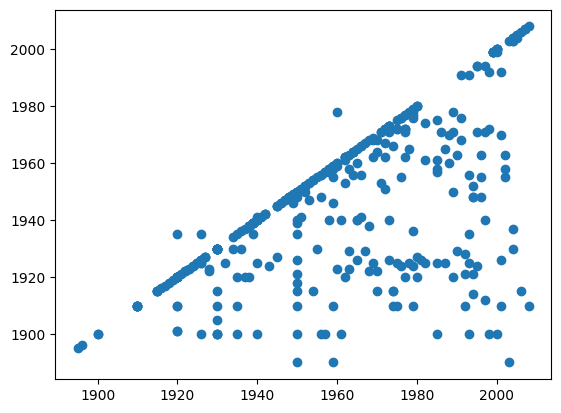

In [413]:
# Visualizando essa visualização
fig, ax = plt.subplots()
ax.scatter(teste2.GarageYrBlt,teste2.YearBuilt)
plt.show()

In [414]:
# Verificando a nova coluna
teste['CheckAnos'] = teste['GarageYrBlt'] == teste['YearBuilt']
teste['CheckAnos'].value_counts()

,count
CheckAnos,
True,1127
False,332


In [415]:
teste.loc[(teste.CheckAnos == False ) & (teste.GarageYrBlt == -1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CheckAnos
53,1514,90,RL,98.0,13260,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,1,2010,Oth,Abnorml,False
71,1532,30,RM,56.0,4485,Pave,Grvl,Reg,Lvl,AllPub,...,0,-1,MnPrv,-1,0,5,2010,WD,Normal,False
79,1540,190,RM,100.0,9045,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,6,2010,WD,Abnorml,False
92,1553,70,RM,60.0,12900,Pave,Grvl,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2010,WD,Normal,False
96,1557,190,RL,60.0,9900,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2010,ConLD,Normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2894,50,C (all),60.0,8520,Grvl,-1,Reg,Bnk,AllPub,...,0,-1,-1,-1,0,4,2006,WD,Normal,False
1449,2910,180,RM,21.0,1470,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,4,2006,WD,Normal,False
1453,2914,160,RM,21.0,1526,Pave,-1,Reg,Lvl,AllPub,...,0,-1,GdPrv,-1,0,6,2006,WD,Normal,False
1454,2915,160,RM,21.0,1936,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,6,2006,WD,Normal,False


In [416]:
# Apagando essa coluna
teste = teste.drop('CheckAnos',axis=1)

In [417]:
# Verificando os valores de construção da casa
teste.loc[teste.GarageCond.isnull(),'YearBuilt']

,YearBuilt
666,1910
1116,1923


In [418]:
# Substituindo as colunas vazias pelo ano de construção da casa
teste.loc[teste.GarageCond.isnull(),'GarageYrBlt'] = teste.loc[teste.GarageCond.isnull(),'YearBuilt']

E a coluna GarageFinish

In [419]:
# Vou verificar os valores quando GarageType == "Detchd"
teste.loc[(teste.GarageType =='Detchd'),'GarageFinish'].value_counts()

,count
GarageFinish,
Unf,365
RFn,15
Fin,10


In [420]:
# Podemos descobrir então a moda e substituir os valores por ela
moda_GarageFinish = teste.loc[(teste.GarageType =='Detchd'),'GarageFinish'].mode()[0]
moda_GarageFinish

'Unf'

In [421]:
# Realizando a substituição dos valores nulos pelo valor mais frequente
teste.loc[(teste.GarageType =='Detchd') & (teste.GarageFinish.isnull()),'GarageFinish'] = moda_GarageFinish

Vou realizar a mesma lógica para as colunas GarageQual e GarageCond

In [422]:
# Vou verificar os valores quando GarageType == "Detchd"
teste.loc[(teste.GarageType =='Detchd'),['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            309
Fa          TA             38
            Fa             19
TA          Fa             16
Fa          Po              3
Gd          Ex              1
Po          Po              1
            Fa              1
TA          Gd              1
            Po              1
Name: count, dtype: int64

In [423]:
# Podemos verificar a moda dessa coluna
moda_GarageQual = teste.loc[(teste.GarageType =='Detchd'),'GarageQual'].mode()[0]
moda_GarageCond = teste.loc[(teste.GarageType =='Detchd'),'GarageCond'].mode()[0]
print(moda_GarageQual, moda_GarageCond)

TA TA


In [424]:
# E usar esse valor no GarageQual
teste.loc[(teste.GarageType =='Detchd') & (teste.GarageQual.isnull()),'GarageQual'] = moda_GarageQual

In [425]:
# E fazer o mesmo para GarageCond
teste.loc[(teste.GarageType =='Detchd') & (teste.GarageCond.isnull()),'GarageCond'] = moda_GarageCond

Para finalizar o tratamento das colunas de garagem, vou tratar GarageCars e GarageArea

In [426]:
# Agora vou visualizar a média desses valores quando GarageType == "Detchd"
media_carros = teste.loc[(teste.GarageType =='Detchd'),['GarageCars','GarageArea']].mean()
media_carros

,0
GarageCars,1.519182
GarageArea,412.202046


In [427]:
# Como Não podemos ter meio carro, vou arredondar os valores
media_carros = round(media_carros,0)
media_carros

,0
GarageCars,2.0
GarageArea,412.0


In [428]:
# Posso usar esses valores se a média for vazia
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageCars.isnull()), 'GarageCars'] = media_carros['GarageCars']
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageArea.isnull()), 'GarageArea'] = media_carros['GarageArea']


In [429]:
# Verificando se ainda há valores nulos
print("GarageCars nulos:", teste['GarageCars'].isnull().sum())
print("GarageArea nulos:", teste['GarageArea'].isnull().sum())

# Listando os valores distintos
print("Valores distintos de GarageCars:", teste['GarageCars'].unique())
print("Valores distintos de GarageArea:", teste['GarageArea'].unique())

GarageCars nulos: 0
GarageArea nulos: 0
Valores distintos de GarageCars: [1. 2. 3. 0. 4. 5.]
Valores distintos de GarageArea: [ 730.  312.  482.  470.  506.  440.  420.  393.  525.  511.  264.  320.
  308.  751.  868.  678.  958.  756.  484.  430.  437.  400.  433.  962.
  880.  676.  528.  429.  461.  762.  713.  588.  480.  496.  852.  592.
  596.  535.  660.  441.  490.  504.  517.    0.  315.  576.  620.  263.
  318.  305.  280.  240.  551.  780.  288.  624.  363.  200.  572.  180.
  365.  231.  450.  416.  591.  690.  522.  467.  209.  366. 1017.  615.
  580.  513.  850.  621.  319.  336.  352.  260.  399.  473.  598.  531.
  625.  330.  741.  776.  520.  686.  253.  286.  495.  616.  275.  502.
  632.  390.  564.  396.  409.  567.  529.  479.  581.  565.  478.  477.
  345.  656.  754.  864.  896.  834.  932.  640.  927.  700.  583.  886.
  871.  949.  685.  649.  539.  701.  392.  397.  436.  434.  644.  394.
  658.  410.  810.  815.  647.  623.  972.  726.  844.  492.  795.  984

In [430]:
# Resumindo os valores vazios da base de teste
teste.isnull().sum().sort_values(ascending=False).head(9)

,0
BsmtCond,45
BsmtQual,44
BsmtExposure,44
BsmtFinType1,42
BsmtFinType2,42
MasVnrArea,15
MSZoning,4
Utilities,2
BsmtHalfBath,2


<a id="porao"></a>
- E fazendo a mesma coisa para as colunas de Porão</font>
    - **NA: No Basement**

In [431]:
# Verificando as colunas que estão disponíveis com o nome de Basement e que possuem valores vazios
col_poram= treino.columns[treino.columns.str.contains('Bsmt') & (treino.isnull().any())]
col_poram

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [432]:
# Analisando os valores dessas colunas
treino.loc[treino.BsmtExposure.isnull(),col_poram].value_counts(dropna=False)

,,,,,count
BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
NaN,NaN,NaN,NaN,NaN,37
Gd,TA,NaN,Unf,Unf,1


In [433]:
treino.loc[treino.BsmtExposure.isnull(),['BsmtFinType2','BsmtFinSF2']].value_counts(dropna=False)

,,count
BsmtFinType2,BsmtFinSF2,
NaN,0,37
Unf,0,1


Identifiquei que vai precisar tratar duas colunas BsmtExposure e BsmtFinType2.

In [434]:
# Trtando a coluna BsmtExposure, verificando os dados na mesma condição
moda_BsmtFinType2 = treino.BsmtFinType2.mode()[0]
moda_BsmtFinType2

'Unf'

In [435]:
# Substituindo os valores nulos pela moda (Unf) apenas na coluna categórica
treino.loc[(treino.BsmtExposure.isnull()) & (treino.BsmtFinSF2 != 0), 'BsmtFinType2'] = moda_BsmtFinType2

Agora considerando as colunas que BsmtQual e BsmtCond são vazias

In [436]:
# Verificando os valores com BsmtQual vazios
treino.loc[treino.BsmtQual.isnull(),['BsmtFinType2','BsmtFinSF2']].value_counts(dropna=False)

,,count
BsmtFinType2,BsmtFinSF2,
NaN,0,37


In [437]:
# Preenchendo o valor vazio com a moda
treino['BsmtFinType2'] = treino['BsmtFinType2'].fillna(moda_BsmtFinType2)

In [438]:
# Quando todas essas colunas estão vazias, segundo a documentação é porque não há porão, sendo assim vou substituir por -1
treino.loc[treino.BsmtQual.isnull(),col_poram] = -1

In [439]:
# Visualizando os valores nulos
treino.isnull().sum().sort_values(ascending=False).head(5)

,0
MasVnrArea,8
BsmtExposure,1
Electrical,1
MSSubClass,0
LotArea,0


Analisando a coluna BsmtExposure

In [440]:
# Analisando os valores dessas colunas
treino.BsmtExposure.value_counts()

,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114
-1,37


In [441]:
# Novamente vou substituir os valores vazios pela moda
moda_BsmtExposure = treino.BsmtExposure.mode()[0]
moda_BsmtExposure

'No'

In [442]:
# Substituindo o valor por No
treino.loc[treino.BsmtExposure.isnull(), 'BsmtExposure'] = moda_BsmtExposure

Realizando o mesmo tratamento na base de teste

In [443]:
# Visualizando as colunas vazias na base de treino
col_poram

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [444]:
# Visualizando as colunas vazias na base de teste
col_poram_teste = teste.columns[teste.columns.str.contains('Bsmt') & (teste.isnull().any())]
col_poram_teste

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [445]:
# Analisando os valores
teste.loc[teste.BsmtQual.isnull(),col_poram_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
          Fa        No            Unf           0.0         Unf           0.0         173.0      173.0        0.0           0.0              1
          TA        No            Unf           0.0         Unf           0.0         356.0      356.0        0.0           0.0              1
          NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
Name: count, dtype: int64

Começando a tratar a coluna BsmtQual

In [446]:
# Analisando essas linhas
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()),col_poram_teste]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [447]:
# Verificando o valor mais frequente
teste.BsmtQual.mode([0])

,BsmtQual
0,TA


In [448]:
# Substituindo os valores nulos pela moda
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()),'BsmtQual'] = teste.BsmtQual.mode([0])

In [449]:
teste.isnull().sum().sort_values(ascending=False).head(11)

,0
BsmtCond,45
BsmtQual,44
BsmtExposure,44
BsmtFinType1,42
BsmtFinType2,42
MasVnrArea,15
MSZoning,4
Utilities,2
BsmtHalfBath,2
BsmtFullBath,2


In [450]:
# valor da moda da coluna
moda_bsmtqual = teste['BsmtQual'].mode().iloc[0]

# linhas a preencher: BsmtQual é NaN e BsmtCond não é NaN
mask = teste['BsmtQual'].isna() & teste['BsmtCond'].notna()

# preenche
teste.loc[mask, 'BsmtQual'] = moda_bsmtqual


In [451]:
# Visualizando essas linhas
teste.iloc[757:759, 30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
757,TA,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA
758,TA,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA


Agora tratando as outras colunas

In [452]:
# Visualizando
teste.loc[teste.BsmtQual.isnull(),col_poram_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
                                                                                                              NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
Name: count, dtype: int64

In [453]:
# Substituindo por 0 as colunas numéricas das casas que não possuem porão
teste.loc[teste.BsmtQual.isnull(),['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = 0

In [454]:
# Substituindo por -1 as colunas de texto dessas casas
teste.loc[teste.BsmtQual.isnull(),['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = -1

In [455]:
# Visualizando os valores vazios
teste.loc[teste.BsmtQual.isnull(),col_poram_teste].value_counts(dropna=False)

,,,,,,,,,,,count
BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,


Analisando o restante das colunas de porão

In [456]:
# Verificando a quantidade de valores na base de treino
treino.isnull().sum().sort_values(ascending=False).head(11)

,0
MasVnrArea,8
Electrical,1
MSZoning,0
MSSubClass,0
LotArea,0
Street,0
Alley,0
LotFrontage,0
LandContour,0
Utilities,0


<a id="restante"></a>
- Sendo as colunas:
    - **MasVnrType</font>**: Tipo de cobertura de alvenaria
        - **None: None**
    - **MasVnrArea</font>**: Área de cobertura de alvenaria em pés quadrados
        - **None: None**
    - **Electrical system</font>**: Sistema elétrico

In [457]:
# filtro: apenas onde MasVnrArea é NaN
mask = treino['MasVnrArea'].isna()

# tabela com as duas colunas
tabela_vazios = treino.loc[mask, ['MasVnrType', 'MasVnrArea']].reset_index(drop=True)
tabela_vazios.head(20)  # visualize as 20 primeiras linhas

,MasVnrType,MasVnrArea
0,-1,NaN
1,-1,NaN
2,-1,NaN
3,-1,NaN
4,-1,NaN
5,-1,NaN
6,-1,NaN
7,-1,NaN


In [458]:
# Vou realizar o tratamento já na base de treino e teste

# --- TREINO ---
treino['MasVnrArea'] = pd.to_numeric(treino['MasVnrArea'], errors='coerce')
mask_sem = treino['MasVnrArea'].isna() | (treino['MasVnrArea'] <= 0) | (treino['MasVnrArea'] == -1)
treino.loc[mask_sem, 'MasVnrType'] = 'None'
treino.loc[mask_sem, 'MasVnrArea'] = 0.0

# --- TESTE ---
teste['MasVnrArea'] = pd.to_numeric(teste['MasVnrArea'], errors='coerce')
mask_sem_t = teste['MasVnrArea'].isna() | (teste['MasVnrArea'] <= 0) | (teste['MasVnrArea'] == -1)
teste.loc[mask_sem_t, 'MasVnrType'] = 'None'
teste.loc[mask_sem_t, 'MasVnrArea'] = 0.0



In [459]:
# Confirmando que as colunas que tem tipo None estão com área 0

# garanta que a área é numérica
treino['MasVnrArea'] = pd.to_numeric(treino['MasVnrArea'], errors='coerce')
teste['MasVnrArea']  = pd.to_numeric(teste['MasVnrArea'],  errors='coerce')

def checar_none_area_zero(df, nome="DF"):
    mask_none = df['MasVnrType'].eq('None')
    total_none = mask_none.sum()
    zeros_none = df.loc[mask_none, 'MasVnrArea'].eq(0).sum()
    violacoes = df.loc[mask_none & (df['MasVnrArea'] != 0), ['MasVnrType','MasVnrArea']]

    print(f"{nome}: linhas com Type=='None' = {total_none}")
    print(f"{nome}: dessas, Area==0        = {zeros_none}")
    print(f"{nome}: violações               = {len(violacoes)}")
    if len(violacoes):
        display(violacoes.head(10))  # veja exemplos

    # opcional: assert para garantir regra
    assert zeros_none == total_none, f"{nome}: há {len(violacoes)} linhas com Type='None' e Area!=0"

checar_none_area_zero(treino, "Treino")
checar_none_area_zero(teste,  "Teste")

Treino: linhas com Type=='None' = 869
Treino: dessas, Area==0        = 869
Treino: violações               = 0
Teste: linhas com Type=='None' = 892
Teste: dessas, Area==0        = 892
Teste: violações               = 0


Avaliando a coluna de sistema elétrico, essa coluna não deve aceitar um valor vazio

In [460]:
# Visualizando os valores em sistema elétrico
treino.Electrical.value_counts(dropna=False)

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1
NaN,1


O mais correto seria pedir essas informações faltantes, porém como não temos essa opção a alternativa que escolho é considerar o valor mais frequente.

In [461]:
# Considerando esse valor como SBrkr
treino.loc[treino.Electrical.isnull(),'Electrical'] = 'SBrkr'

In [462]:
# Verificando os valores nulos
treino.isnull().sum().sort_values(ascending=False).head(11)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0


Todos os valores da nossa base de treino foram tratados, vou seguir para os faltantes da base de teste.

In [463]:
# Verificando os valores nulos
teste.isnull().sum().sort_values(ascending=False).head(11)

,0
MSZoning,4
BsmtCond,3
BsmtExposure,2
Utilities,2
Functional,2
Exterior2nd,1
SaleType,1
KitchenQual,1
Exterior1st,1
LotShape,0


<a id='restante_teste'></a>
- **Analisando o restante da base de teste**
- **Entendendo essas colunas**
    - **MSZoning</font>**: Região onde fica a casa
        - NA: A informação não foi adicionada na base (ausência de informação)
    - **Functional</font>**: Funcionalidades da casa
        - NA: A informação não foi adicionada na base (ausência de informação)
    - **Utilities</font>**: Utilidades disponíveis
        - NA: A informação não foi adicionada na base (ausência de informação)


In [464]:
# Verificando os valores em MSZoning
teste.MSZoning.value_counts(dropna=False)

,count
MSZoning,
RL,1114
RM,242
FV,74
C (all),15
RH,10
NaN,4


In [465]:
# Usando o valor da moda para substituir os valores nulos
teste.loc[teste.MSZoning.isnull(),'MSZoning'] = 'RL'

In [466]:
# Verificando os valores em Utilities
teste.Utilities.value_counts(dropna=False)

,count
Utilities,
AllPub,1457
NaN,2


In [467]:
# Usando a moda para substituir os valores nulos
teste.loc[teste.Utilities.isnull(),'Utilities'] = 'AllPub'

In [468]:
# Verificando os valores em Functional
teste.Functional.value_counts(dropna=False)

,count
Functional,
Typ,1357
Min2,36
Min1,34
Mod,20
Maj1,5
Maj2,4
NaN,2
Sev,1


In [469]:
# Usando a moda para substituir os valores nulos
teste.loc[teste.Functional.isnull(),'Functional'] = 'Typ'

In [470]:
# Verificando os valores vazios
teste.isnull().sum().sort_values(ascending=False).head(6)

,0
BsmtCond,3
BsmtExposure,2
Exterior1st,1
Exterior2nd,1
KitchenQual,1
SaleType,1


In [471]:
# Verificando a coluna BsmtCond
teste.BsmtCond.value_counts(dropna=False)

,count
BsmtCond,
TA,1295
Fa,59
Gd,57
-1,42
Po,3
NaN,3


In [472]:
#  Colunas que contêm "Bsmt"
colunas_bsmt = [c for c in teste.columns if 'Bsmt' in c]

#  Linhas onde BsmtCond está vazia (NaN)
mascara_bsmtcond_vazia = teste['BsmtCond'].isna()

# Visualizar apenas as colunas de Bsmt nessas linhas
tabela_bsmt_quando_cond_vazia = teste.loc[mascara_bsmtcond_vazia, colunas_bsmt]

# Resultados
print("Linhas com BsmtCond vazia:", mascara_bsmtcond_vazia.sum())
print("Total de colunas Bsmt:", len(colunas_bsmt))
tabela_bsmt_quando_cond_vazia.head(20)

Linhas com BsmtCond vazia: 3
Total de colunas Bsmt: 11


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [473]:
# Preencher BsmtCond vazio copiando de BsmtQual
mascara = teste['BsmtCond'].isna()
teste.loc[mascara, 'BsmtCond'] = teste.loc[mascara, 'BsmtQual']

In [474]:
# Verificando os valores vazios
teste.isnull().sum().sort_values(ascending=False).head(5)

,0
BsmtExposure,2
KitchenQual,1
Exterior1st,1
Exterior2nd,1
SaleType,1


In [475]:
# Verificando a coluna BsmtExposure
teste.BsmtExposure.value_counts(dropna=False)

,count
BsmtExposure,
No,951
Av,197
Gd,142
Mn,125
-1,42
NaN,2


In [476]:
# Vou utilizar a mesma Lógica que utilizei acima

#  Colunas que contêm "Bsmt"
colunas_bsmt = [c for c in teste.columns if 'Bsmt' in c]

#  Linhas onde BsmtExposure está vazia (NaN)
mascara_BsmtExposure_vazia = teste['BsmtExposure'].isna()

# Visualizar apenas as colunas de Bsmt nessas linhas
tabela_bsmt_quando_cond_vazia2 = teste.loc[mascara_BsmtExposure_vazia, colunas_bsmt]

# Resultados
print("Linhas com BsmtCond vazia:", mascara_BsmtExposure_vazia.sum())
print("Total de colunas Bsmt:", len(colunas_bsmt))
tabela_bsmt_quando_cond_vazia2.head(20)

Linhas com BsmtCond vazia: 2
Total de colunas Bsmt: 11


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


Podemos verificar que BsmtFinType1 é igual a Unf, ou seja, não está finalizado, sendo assim podemos considerar que é -1, pois não tem.

In [477]:
# Substituir os vazios de BsmtExposure por -1
teste.loc[mascara_BsmtExposure_vazia, 'BsmtExposure'] = -1

In [478]:
# Verificando os valores vazios
teste.isnull().sum().sort_values(ascending=False).head(4)

,0
KitchenQual,1
SaleType,1
Exterior2nd,1
Exterior1st,1


In [479]:
# Visualizando as ultimas colunas
print(teste.Exterior2nd.mode()[0])
print(teste.SaleType.mode()[0])
print(teste.Exterior1st.mode()[0])
print(teste.KitchenQual.mode()[0])

VinylSd
WD
VinylSd
TA


In [480]:
teste.loc[teste.Exterior2nd.isnull(), 'Exterior2nd']  = teste.Exterior2nd.mode()[0]
teste.loc[teste.SaleType.isnull(),    'SaleType']     = teste.SaleType.mode()[0]
teste.loc[teste.Exterior1st.isnull(), 'Exterior1st']  = teste.Exterior1st.mode()[0]
teste.loc[teste.KitchenQual.isnull(), 'KitchenQual']  = teste.KitchenQual.mode()[0]

In [481]:
# Verificando os valores vazios
teste.isnull().sum().sort_values(ascending=False).head(5)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0


Com os bases tratadas posso agora novamente utilizar nosso modelo e analisar os ganhos que tive em precisão.

In [482]:
# Verificando o formato da base
treino.shape

(1460, 81)

In [483]:
# Verificando o formato da base
teste.shape

(1459, 80)

In [484]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()


,count
object,43
int64,35
float64,3


In [485]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

,count
object,43
int64,26
float64,11


Garantindo não ter colunas de texto

In [486]:
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [487]:
# Criando uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 38)

In [488]:
# Mantendo também apenas as colunas numéricas para a base de teste (que não possui SalePrice)
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 37)

## Criando novamente o modelo

- **Separando em treino e teste**


In [489]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [490]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vou utilizar. vou utilizar os memos da primeira etapa:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [491]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [492]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

In [493]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [494]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

In [495]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [496]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

In [497]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23908.41241228956
1546018499.3696103


In [498]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

28131.10788381743
2605999183.9626555


In [499]:
# e do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33247.14937759336
2732965076.467842


Como fiz anteriormente, vou visualizar em forma de gráfico a relação do y_test com as previsões feitas

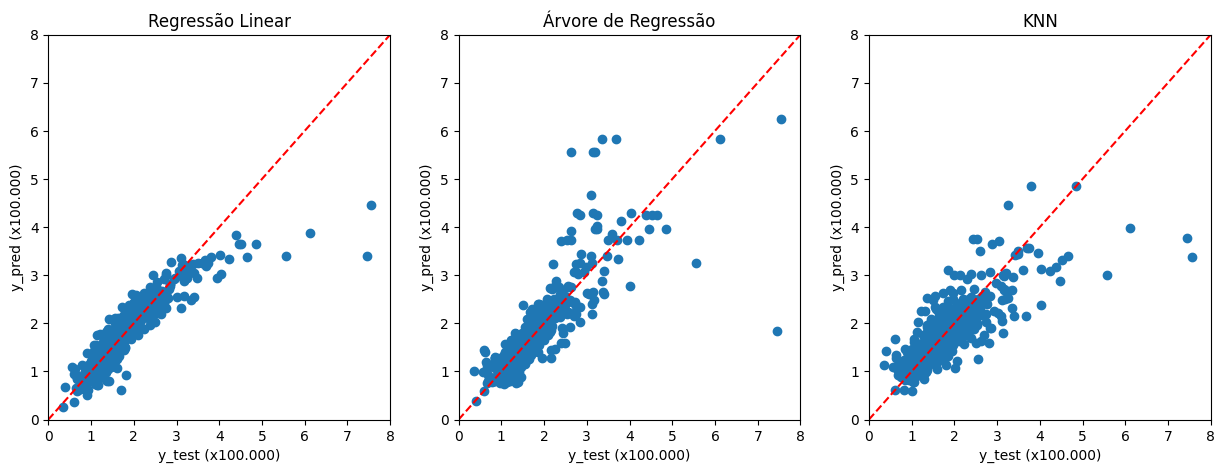

In [500]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

- **Vou utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio.**

In [501]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [502]:
# Vou usar a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [503]:
# Adicionando essa coluna de previsão na base
teste['SalePrice'] = y_pred

In [504]:
# Extraindo somente o Id e o SalePrice para avaliar o modelo no Kaggle
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,121257.501624
1,1462,133303.929920
2,1463,169238.649242


In [505]:
# Exportando essa base
# base_kaggle.to_csv('resultado2.csv',index=False)

Respondendo as perguntas do projeto.

Os resultados fazem sentido?
R: Sim, o resultado foi o esperado, consegui treinar e prever os preços da casa que constavam como desafio principal, utilizando conhecimentos que aprendi durante as aulas.
Foi observado algum problema de overfitting?
Não foi identificado Overfitting.
Compare os resultados de diferentes modelos e Justifique.
Entre os modelos testados (Linear, Árvore de Decisão e KNN), a Regressão Linear apresentou o melhor equilíbrio entre erro e generalização. No gráfico de reais vs. preditos, sua nuvem ficou mais próxima da diagonal ideal, com menor dispersão; já a Árvore mostrou alta variância (pontos espalhados e previsões exageradas em faixas médias) e o KNN subestimou os valores altos e é sensível à escala/ao “k”.
